#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 개인과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 데이터 알아보기

#### 데이터 안내
- 'smoking_health_data.csv'
- 건강 정보 데이터


## 1. 데이터 불러오기
### 모든 데이터 분석의 시작은 '데이터 불러오기' 부터 입니다!
### 데이터 프레임을 불러오고 변수로 저장해봅시다!
- csv : pd.read_csv("파일이름. csv")
- txt : pd.read_csv("파일이름. csv", sep="구분자")
- xlsx : pd.read_excel('파일이름.xlsx')
- pickle : pd.read_pickle("파일이름.pkl")

[참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용됩니다)

In [ ]:
# 필요한 라이브러리들 불러오기
import pandas as pd


##### [TODO] 데이터 로딩
- Pandas 라이브러리를 활용해서 'smoking_health_data.csv' 파일을 'health_data' 변수에 저장하세요.
- 데이터 프레임의 크기를 확인해보세요. (shape)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
health_data = pd.read_csv("smoking_health_data.csv")



## 기본 정보 확인 및 클렌징
- 데이터 클렌징이란 ? 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정입니다.

##### [TODO] 기본 정보 확인하기
- 'health_data' 데이터의 정보를 확인해보세요.
- 'describe', 'info', 'head', 'tail' 등 전부 활용해봅시다.

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        6860 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     6860 non-null   float64
 8   혈압        6860 non-null   float64
 9   중성 지방     6860 non-null   float64
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(8), int64(9), object(1)
memory usage: 984.5+ KB


In [ ]:
health_data.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,6860.000000,7000.000000,6860.000000,6860.000000,6860.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011414,0.227429,99.307289,45.555102,127.028134,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.430137,0.419202,21.190058,8.831564,73.219161,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,399.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [ ]:
health_data.tail(50)

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
6950,TRAIN_6950,30,180,75,23.15,1.00,1,87.0,40.0,92.0,1.0,245,77,150,15.5,1,1.57,0
6951,TRAIN_6951,55,145,60,28.54,0.65,1,90.0,49.0,120.0,0.5,243,49,170,13.7,1,0.65,0
6952,TRAIN_6952,40,160,70,27.34,1.15,0,103.0,48.0,84.0,0.9,186,60,109,12.7,1,1.00,0
6953,TRAIN_6953,35,165,70,25.71,1.10,0,127.0,48.0,112.0,1.1,233,51,160,16.5,1,0.51,0
6954,TRAIN_6954,55,160,45,17.58,0.50,0,119.0,34.0,80.0,0.9,176,60,100,12.9,1,1.69,0
6955,TRAIN_6955,40,180,60,18.52,1.05,0,108.0,48.0,77.0,0.9,216,64,136,15.0,1,1.50,1
6956,TRAIN_6956,60,155,55,22.89,0.40,0,88.0,57.0,80.0,0.9,294,85,193,13.9,1,1.28,0
6957,TRAIN_6957,25,170,75,25.95,0.55,0,123.0,38.0,270.0,1.1,150,35,61,15.2,1,0.55,1
6958,TRAIN_6958,70,155,55,22.89,0.50,0,93.0,70.0,308.0,1.0,254,39,153,15.2,2,0.59,0
6959,TRAIN_6959,40,165,55,20.20,1.35,0,99.0,54.0,114.0,0.7,185,72,90,12.9,1,1.24,0


##### [TODO] 위 데이터에서 BMI를 기준으로 체중 상태 구분 칼럼을 만들어보세요.
- BMI 구간을 기준으로 건강상태를 분류해볼까요 ?
- 저체중 (<18.5)
- 정상 (<25)
- 과체중 (<30)
- 비만 (>=30)


In [ ]:
#구분기준 리스트, 라벨 만들기
#health_data['BMI'].max() -> 데이터 추가시 어떤 큰 값 들어와도 수정안해도 되도록
#health_data['BMI'].max()+1 -> + 1까지 하면 어떤 값이 와도 마지막 구간에 포함됨
bmi_list = [0,18.5,25,30,float('inf')] #30이상은 무조건 마지막 라벨! 이방식 사용함
bmi_label = ['저체중','정상','과체중','비만']
#판다스 라이브러리 pd.cut() 함수
#연속형 수치 데이터(Continuous Data)를 구간별로 나누어 범주형 데이터(Categorical Data)로 변환
health_data['체중상태구분'] = pd.cut(health_data['BMI'],
                               bins = bmi_list,
                               labels=bmi_label,
                               right=False)
print(health_data[['BMI','체중상태구분']])

        BMI 체중상태구분
0     24.22     정상
1     24.44     정상
2     17.30    저체중
3     20.00     정상
4     27.06    과체중
...     ...    ...
6995  22.49     정상
6996  23.88     정상
6997  30.86     비만
6998  24.44     정상
6999  23.88     정상

[7000 rows x 2 columns]


##### [TODO] 위 데이터에서 '나이'를 기준으로 나이대를 구분하는 칼럼을 만들어보세요.

'나이' 구간을 기준으로 나이대를 분류해볼까요 ?
- 30대 이하
- 30~50대
- 50~70대
- 70대 이상

In [ ]:
age_list=[0,30,50,70,float('inf')]
age_label =['30대 이하','30~50대','50~70대','70대 이상']
health_data['연령대'] = pd.cut(health_data['나이'],
                               bins = age_list,
                               labels=age_label,
                               right=True)

##### [TODO] 결측치 처리
결측치를 확인 했다면 분석 결과가 왜곡될 수 있으므로 반드시 확인하고 적절히 처리해야 합니다!

평균, 중앙값, 최빈값으로 채우는 것이 일반적이지만, 해당 변수의 의미를 고려해 선택해야 합니다.

예: 혈압은 중앙값, 시력은 최빈값, 나이대별 중성지방은 그룹 평균으로 채우기, 공복 혈당은 평균으로 채우기

In [ ]:
health_data['혈압'].dtype
health_data['혈압'].isna().sum()
health_data['혈압'].describe()

#혈압 최대 91 최소41.. 값이 너무 낮아서 이상함 빼고 보는게 맞나 아니면 상관관계가 있다 정도로만 보기?
#정상수축기 혈압:최소: 90 이상,평균: 110~130,최대: 180 전후 mmHg
#여기는 값이 혈압측정값이 아니라 점수화된 파생 변수일수도 있겠다
#혈압 변수는 정확하지 않으니 제외하고 봐야지

,혈압
count,6860.000000
mean,45.555102
std,8.831564
min,14.000000
25%,40.000000
50%,45.000000
75%,50.000000
max,91.000000


In [ ]:
# 컬럼명 정리 + 통일 컬럼명에 빈문자열있으면 접근못함,조건필터링실패
#지금은 괜찮지만 그냥 기본셋팅해두기..!
health_data = health_data.copy()
health_data.columns = health_data.columns.str.strip()

#숫자형 문자 섞이면 NaN (errors="coerce")
numeric_cols = [
    "나이", "키(cm)", "몸무게(kg)", "BMI",
    "시력", "충치", "공복 혈당", "혈압", "중성 지방",
    "혈청 크레아티닌", "콜레스테롤", "고밀도지단백", "저밀도지단백",
    "헤모글로빈", "요단백", "간 효소율"
]
for col in numeric_cols:
    if col in health_data.columns:
        health_data[col] = pd.to_numeric(health_data[col], errors="coerce")

#중요컬럼 결측행 삭제
health_data = health_data.dropna(subset=["나이","키(cm)","몸무게(kg)","BMI"])

#변수 타입 변환 (기존 데이터프레임에 덮어씌운다 값 똑같아서 굳이 새 컬럼 만들 필요 없음)
#숫자지만 계산 대상이 아니므로 범주형인 경우   (충치 0,1 유지 없는건 unknown 인데 없는값이 없다 ㅋ..말장난같아)
if '충치' in health_data.columns:
    health_data['충치'] = health_data['충치'].astype('category')
if 'label' in health_data.columns:
    health_data['label'] = health_data['label'].astype('category')
if '요 단백' in health_data.columns:
    health_data['요 단백'] = health_data['요 단백'].fillna('unknown')
    health_data['요 단백'] = health_data['요 단백'].astype('category')
#범주형변수 요단백은 1,2,3,4,5 최빈값으로 넣으면 아마 1이들어가 그럼 정상이 되어버려 분석의미없어져

#결측치 비율 확인
check_ratio = health_data['공복 혈당'].isnull().mean()
print(check_ratio)

#결측치 개수 확인
check_count = health_data['공복 혈당'].isna().sum()
print(check_count)

#연속형 변수 판단 -> 변수 특성과 분포를 생각..! 시력은 이상치 영향을 고려해 중앙값으로 대체,
#흡연 여부에 따라 차이 o -> 흡연여부별 대표값(평균 또는 중앙값)으로 대체

#연속형변수 - 중앙값으로
med_cols = ['시력','중성 지방','간 효소율','저밀도지단백']
#med_cols 중에서 columns에 있는 애들만 새 리스트로
for col in med_cols:
  if col in health_data.columns:
      health_data[col] = health_data[col].fillna(health_data[col].median())

#연속형변수 - 흡연여부별 평균으로
#groupby + mean = 요약표 ,값 넣는건 groupby + transform
avg_cols = ['공복 혈당','혈압','혈청 크레아티닌',
                        '콜레스테롤','고밀도지단백','헤모글로빈']

for col in avg_cols:
  if col in health_data.columns:
      health_data[col] = health_data[col].fillna(health_data.groupby('label')[col].transform('mean'))
#health_data.groupby('label')[col].mean() -> 그룹 개수만큼만 있는 요약값 (fillna()에 바로 쓰면 행(row)에 맞게 못 들어감)
#health_data.groupby('label')[col].transform('mean') -> 각 행의 label 값에 따라 그룹 평균 복붙됨

#결측치 완료 확인
print('결측치 처리 결과 확인 0이면 끝')
print(f'결과 : ',health_data.isna().sum().sum())
print(health_data.describe())

#저장
health_data.to_csv('health_data_clean.csv', index=False)


0.02
140
결측치 처리 결과 확인 0이면 끝
결과 :  0
                나이        키(cm)      몸무게(kg)          BMI           시력  \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean     43.973571   164.781429    65.932857    24.144423     1.011186   
std      12.063793     9.170213    12.978702     3.501945     0.425816   
min      20.000000   135.000000    30.000000    14.270000     0.100000   
25%      35.000000   160.000000    55.000000    21.600000     0.800000   
50%      40.000000   165.000000    65.000000    23.880000     1.000000   
75%      50.000000   170.000000    75.000000    26.120000     1.200000   
max      85.000000   190.000000   130.000000    42.450000     9.900000   

             공복 혈당           혈압        중성 지방     혈청 크레아티닌        콜레스테롤  \
count  7000.000000  7000.000000  7000.000000  7000.000000  7000.000000   
mean     99.307704    45.554877   126.627571     0.884900   197.276571   
std      20.979743     8.742821    72.537387     0.241523    36.306494   
m

/tmp/ipython-input-4271509609.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data[col] = health_data[col].fillna(health_data.groupby('label')[col].transform('mean'))


## 3. 데이터 분석하기

KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
- 데이터들의 패턴 탐색
- 변수들간의 관계 파악

##### [TODO] 데이터 분포 알아보기
- 다양한 변수를 기준으로 그래프를 그려보고 변수 인사이트를 도출해보세요.
- 데이터의 형태와 분포를 시각화하면 이상치, 극단값, 데이터 패턴을 쉽게 파악할 수 있습니다 !

In [ ]:
!apt-get -qq update
!apt-get -qq install -y fonts-noto-cjk
!rm -rf ~/.cache/matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
#폰트 매니저에 폰트 추가
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', # 경로
    name='NotoSansCJK')                        # 내가 부여할 이름
fm.fontManager.ttflist.insert(0, fe)            # 폰트 목록 맨 앞에 삽입
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 11

#전역 폰트 설정 (이제 fontproperties를 일일이 안 써도 됩니다!)
plt.rcParams['font.family'] = 'NotoSansCJK'
plt.rcParams['axes.unicode_minus'] = False        # 마이너스 깨짐 방지


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


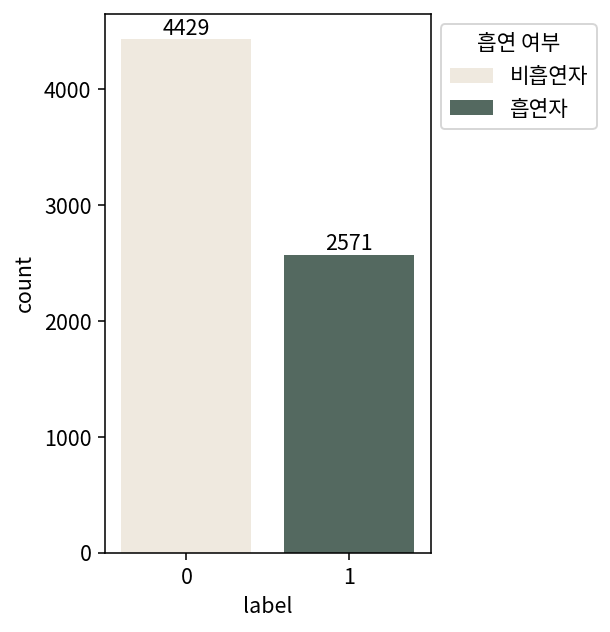

In [ ]:
df = pd.read_csv('health_data_clean.csv')


#hue 변수의 “값 타입”과 palette 키 타입이 불일치해결용
df['label'] = df['label'].astype(int)
#범례 전용 함수 넣기 복붙 귀찮
smoking_palette ={ 0:'#F2E9DC',#비흡연자
                  1:'#506D61' #흡연자
                  }
def set_smoking_legend(ax):
    ax.legend(
        title='흡연 여부',
        labels=['비흡연자', '흡연자'],
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )

# 제일 기본..! label 컬럼 분포 확인 , ax 수치 표시
plt.figure(figsize=(3, 5))
ax = sns.countplot(x='label',
              data=df,
              hue='label',
              palette =smoking_palette)
for container in ax.containers:
    ax.bar_label(container)

set_smoking_legend(ax)

plt.show()

<Figure size 420x1120 with 0 Axes>

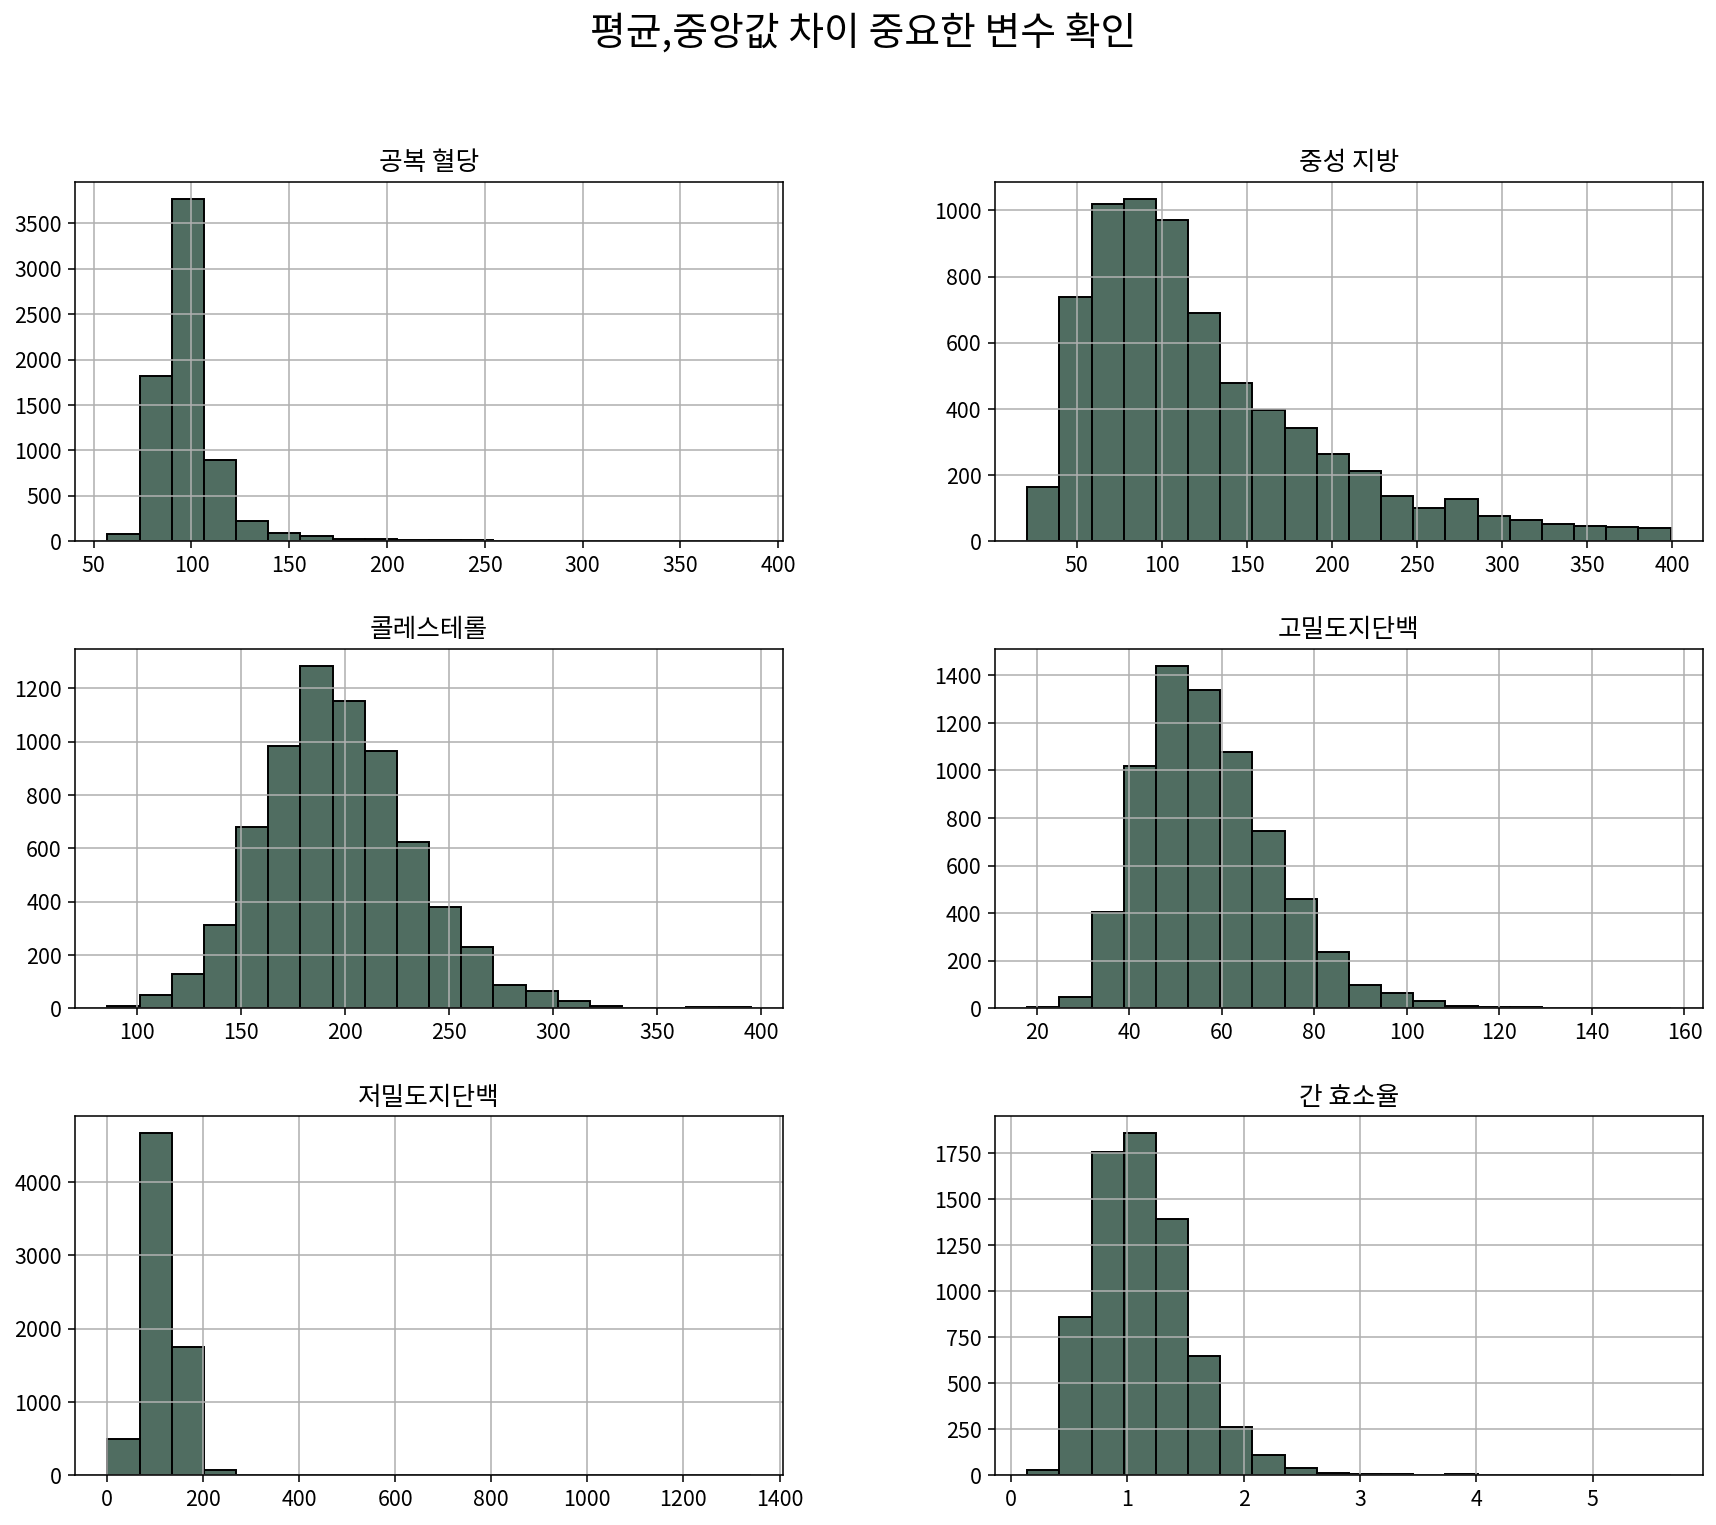

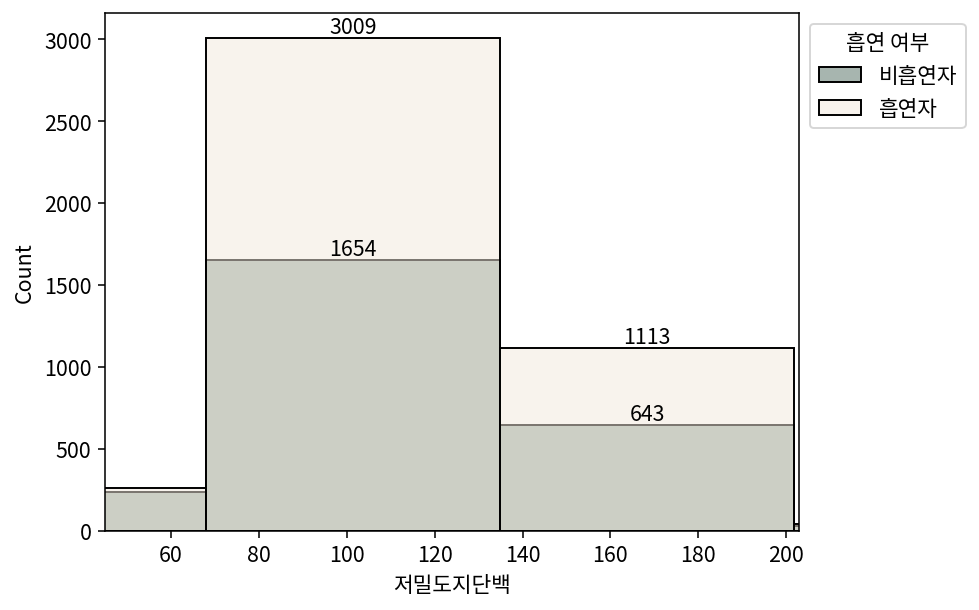

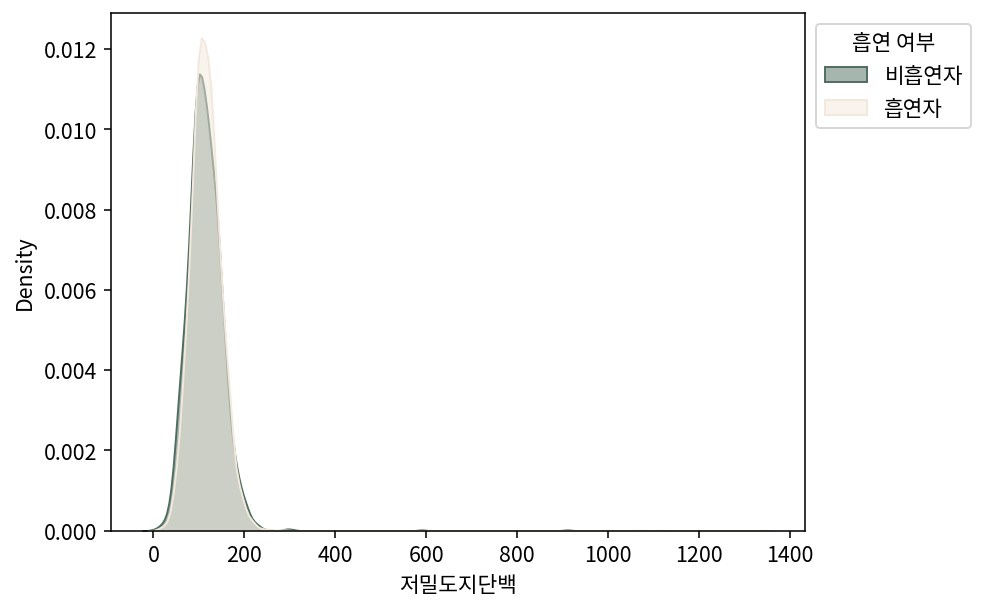

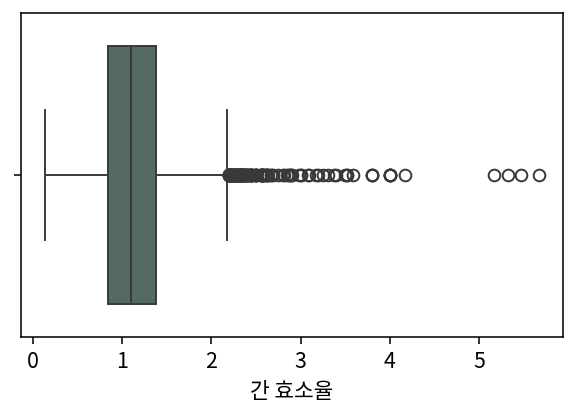

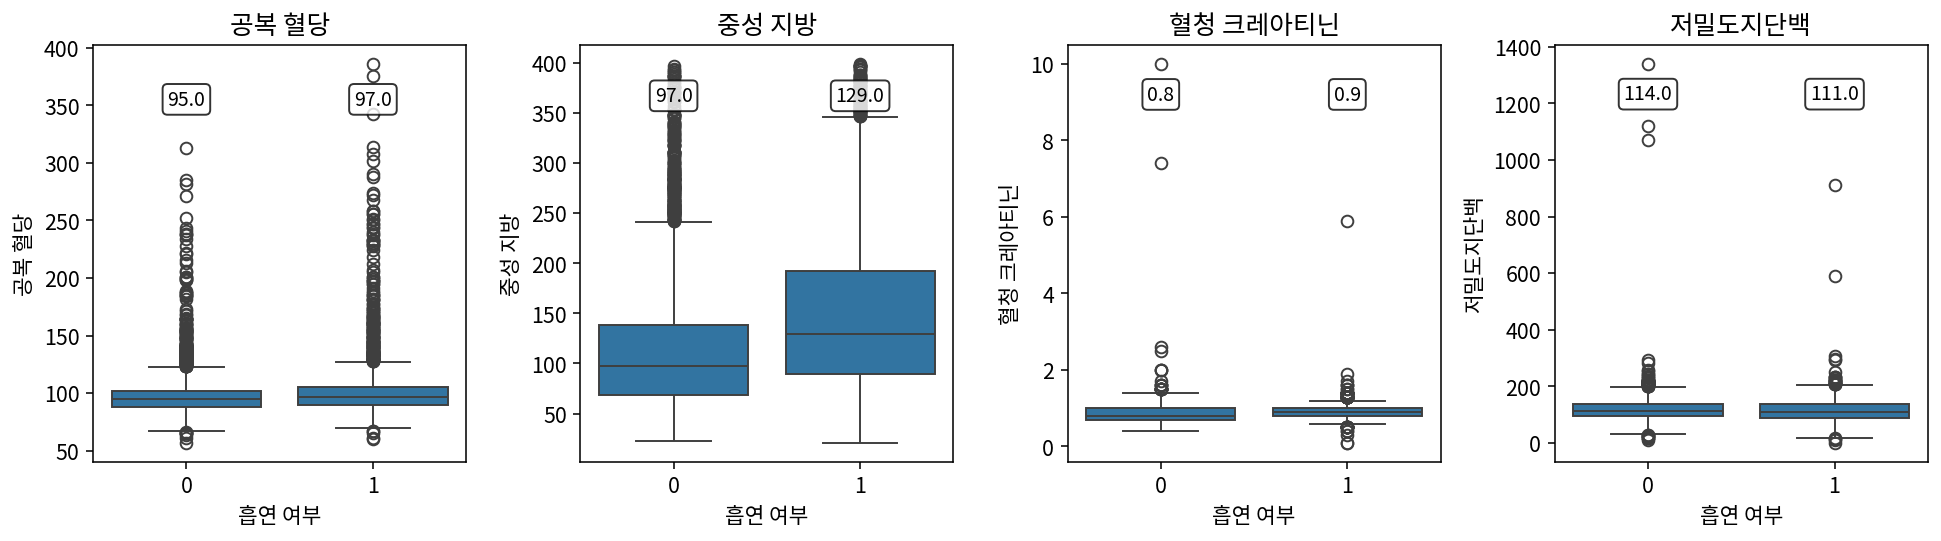

In [ ]:
#평균/중앙값 차이가 중요한 변수 이상치 확인
#공복 혈당, 중성 지방, 콜레스테롤, LDL/HDL,간 효소율(대사부담증가 결과변수로..)
num_cols = ['공복 혈당', '중성 지방', '콜레스테롤',
            '고밀도지단백','저밀도지단백','간 효소율']
plt.figure(figsize=(3,8))
health_data[num_cols].hist(figsize=(15,12),
                           bins=20,
                           edgecolor='black',
                           color='#506D61')
plt.suptitle("평균,중앙값 차이 중요한 변수 확인",fontsize=20, fontweight='bold')
plt.show()
#공복혈당은 한 구간만 너무 높다 근데 또 250넘는 값도 있어.. 확인필요함
#고밀도지단백:콜레스테롤을 회수해서 간으로 가져감 (보호 역할)- 개인차 적음 그래프상 완만?한 편이래 ㅇㅋㅇㅋ
#저밀도지단백:콜레스테롤을 말초로 운반 (과하면 위험)-식습관, 흡연, 대사상태 영향받음 개인차 매우 큼 낮은값 집중
q_low, q_high = df['저밀도지단백'].quantile([0.01, 0.99]) #분위수 기준으로 x축 자르기
hue_order = [0, 1] #색 반대로된거 순서 지정해주기
ax = sns.histplot(
    data=df,
    x='저밀도지단백',
    hue='label',
    hue_order=hue_order,
    bins=20,
    stat='count',
    common_norm=False,
    alpha=0.5,
    palette=smoking_palette
)
for container in ax.containers:
    ax.bar_label(container)
set_smoking_legend
plt.xlim(q_low, q_high) #상·하위 1%만 화면에서 제외한거
set_smoking_legend(ax)
plt.show()

ax = sns.kdeplot(
    data=df,
    x='저밀도지단백',
    hue='label',
    hue_order=hue_order,
    common_norm=False,
    fill=True,
    alpha=0.5,
    palette=smoking_palette
)
set_smoking_legend(ax)
plt.show()
#간 효소율 우측 긴 꼬리.. 극단값 있음..! 그러니 평균 비교보다는 중앙값을 위주로 보자
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['간 효소율'],color='#506D61')
plt.show()

#공복혈당,중성 지방, 혈청 크레아티닌,저밀도지단백
box_cols=['공복 혈당','중성 지방', '혈청 크레아티닌','저밀도지단백']
fig, axes = plt.subplots(1, len(box_cols), figsize=(14, 4))

for ax,col in zip(axes, box_cols):
    sns.boxplot(
                data=df, x='label', y=col,
                ax=ax,

                )
    ax.set_xlabel('흡연 여부')
    ax.set_ylabel(col)
    ax.set_title(col)
    # 중앙값 계산 후 텍스트로 표시
    med = df.groupby('label')[col].median()
    ymax = df[col].max()
    for x_pos, label_val in enumerate(sorted(df['label'].unique())):
        y_text = ymax * 0.92   # 항상 위쪽에 고정
        ax.text(
            x_pos,
            y_text,
            f'{med[label_val]:.1f}',
            ha='center',
            va='center',
            fontsize=10,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.25', fc='white', alpha=0.8)
        )
plt.tight_layout()
plt.show()

In [ ]:
#위에 범례랑 라벨별 색 설정해둔거 Seaborn이 hue 순서를 멋대로 지정해서..색이 반대로 나옴
df['label'].dtype
df['label'].unique()
df['label'].value_counts(dropna=False)
#hue_order = [0, 1] 해놓고 hue_order=hue_order 했는데 아직도 반대네.. 뭐 시 당 가


,count
label,
0,4429
1,2571


공복 혈당의 중앙값 차이는 크지 않으나,
흡연자에서 고혈당 극단값이 상대적 더 존재하ㅁ

중성 지방 중앙값 차이가 난다
흡연자 그룹의 IQR이 훨씬 넓음 → 개인차 + 대사 불안정,
흡연자그룹은 높은값에 상위 이상치가 밀집.

혈청 크레아티닌

저밀도 지단백 (LDL) 중앙값은 거의 차이 없으나 이상치가 매우 김 흡연자 쪽에서 극단적으로 높은 값들이 존재? (동그라미가 이상치)

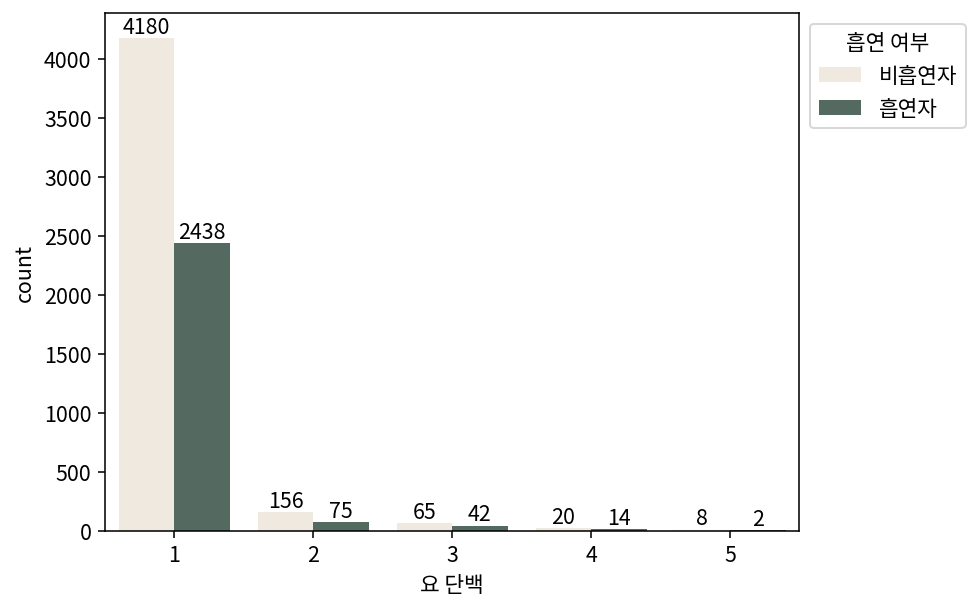

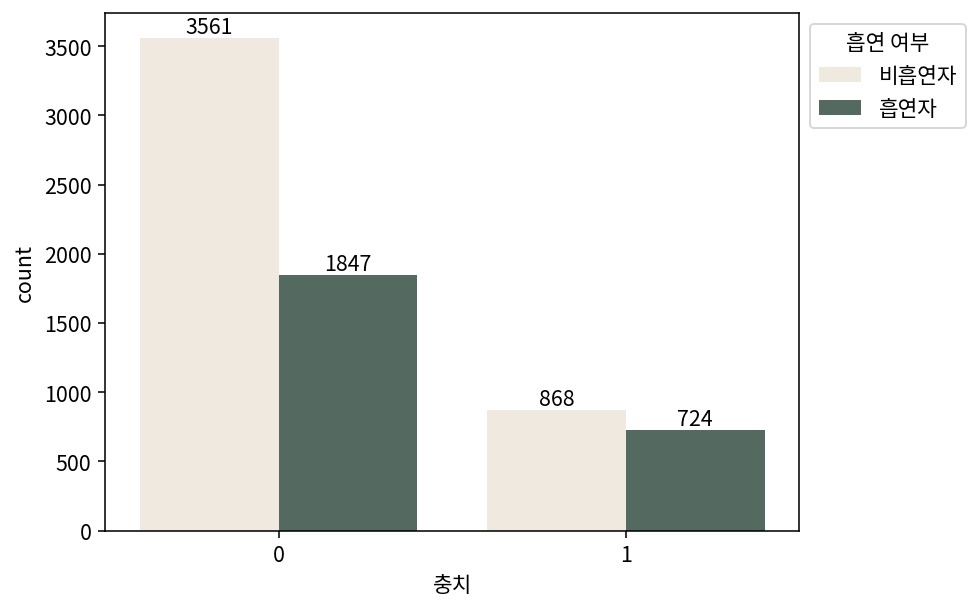

In [ ]:
#범주형 변수 확인 충치, 요 단백
ax = sns.countplot(x= '요 단백',
                   data=df,
                   hue='label',
                   palette = smoking_palette)
for container in ax.containers:
    ax.bar_label(container)
set_smoking_legend(ax)
plt.show()

ax = sns.countplot(x= '충치',
                   data=df,
                   hue='label',
                   palette = smoking_palette)
for container in ax.containers:
    ax.bar_label(container)
set_smoking_legend(ax)
plt.show()

